In [93]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.fftpack
from matplotlib import cm
from matplotlib.ticker import FuncFormatter, MultipleLocator, LinearLocator, FormatStrFormatter
import scipy.fftpack
from matplotlib import collections as matcoll


In [94]:
x = np.arange(2*np.pi/100,2*np.pi,2*np.pi/100)
vis = 0.180
t = 1.2
n = np.arange(1,20,1)
coeff =[0 for i in range(np.size(n))]
cutCoeff  =[0 for i in range(np.size(n))]


In [95]:
for i in range(np.size(n)):
        coeff[i]= integrate.quad(lambda x: np.exp(-1/(4*vis*np.pi)*(1-np.cos(2*np.pi*x)))*np.cos(i*x),\
        0,np.pi*2)


In [96]:
a0 = integrate.quad(lambda x: np.exp((-1/(4*vis*np.pi*1))*(1-np.cos(x))), 0,2*np.pi)

In [97]:
for i in range(np.size(n)):
    cutCoeff[i] = coeff[i][0]

In [98]:
def u(x): 
    out = 2 +4*np.pi*vis\
           *((cutCoeff[0]*np.exp(-vis*1*1*t)*1*np.sin(1*x)\
           + cutCoeff[1]*np.exp(-vis*2*2*t)*2*np.sin(2*x)\
           + cutCoeff[2]*np.exp(-vis*3*3*t)*3*np.sin(3*x)\
           + cutCoeff[3]*np.exp(-vis*4*4*t)*4*np.sin(4*x)\
           + cutCoeff[4]*np.exp(-vis*5*5*t)*5*np.sin(5*x))\
                                    /                         \
          (a0+(cutCoeff[0]*np.exp(-vis*1*1*t)*1*np.cos(1*x)\
          +cutCoeff[1]*np.exp(-vis*2*2*t)*2*np.cos(2*x)\
          +cutCoeff[2]*np.exp(-vis*3*3*t)*3*np.cos(3*x)\
          +cutCoeff[3]*np.exp(-vis*4*4*t)*4*np.cos(4*x)\
          +cutCoeff[4]*np.exp(-vis*5*5*t)*5*np.cos(5*x))))
    return out

In [99]:
tempValue =[0 for i in range(np.size(x))]
cutValue =[0 for i in range(np.size(x))]

In [100]:
for i in range(np.size(x)):
    tempValue[i] = u(x[i])

In [101]:
for i in range(np.size(x)):
    cutValue[i] = tempValue[i][0]

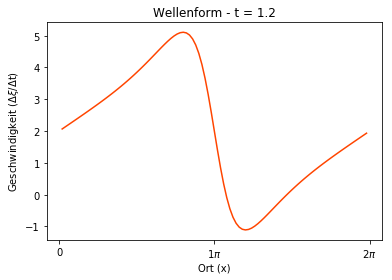

In [111]:
color=iter(cm.twilight(np.linspace(0,1,1000)))
fig, ax = plt.subplots()
ax.plot(x, cutValue, c='orangered')
    
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.set(xlabel='Ort (x)', ylabel='Geschwindigkeit ($\\Delta\\xi$/$\\Delta$t)',
       title='Wellenform - t = 1.2')
#ax.set_ylim([0,6])
fig.savefig("DiffuseBurgers_t1-2.png", dpi=300)
plt.show()

In [15]:
yf = 50*np.fft.fft(cutValue)

In [104]:
print(np.size(yf))
N = np.size(cutValue)

xf = np.arange(1,100,1)
print(np.size(x))

99
99


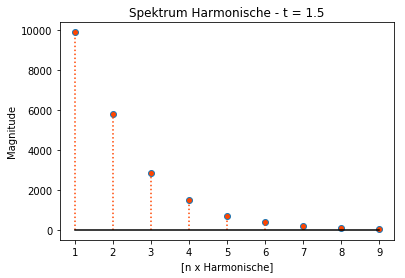

In [110]:
fig, ax = plt.subplots(1,1)
markerline, stemlines, baseline = plt.stem( xf[:N-90],np.abs(yf[:N-90]),linefmt='orangered', markerfmt='o', bottom=1.1)  

ax.tick_params(axis='x', colors='black')

plt.setp(stemlines, 'linestyle', 'dotted')
markerline.set_markerfacecolor('orangered')
plt.setp(baseline, c='black')
ax.set(xlabel='[n x Harmonische]',ylabel='Magnitude', title='Spektrum Harmonische - t = 1.5')
#fig.savefig("Spekt1-2.png", dpi=300)
plt.show()

In [426]:
print(cutCoeff)

[4.282064467015721, 0.2095280000913943, 1.0167303324962254, 0.06362677462490052, 0.09560632194590665, -0.030002926296212134, -0.019329125641378016, -0.0046720798386243115, 0.015622158683876286, 0.020500674739456052, 0.010731584256189548, -0.004673379965043571, -0.014288429380880228, -0.01252762403823363, -0.002298347912778334, 0.008177962414932311, 0.011621783348892953, 0.006498861669502781, -0.0026328542993417636]
